# Classification and regression with neural networks

## Binary Classification Example: Movie Reviews

### The IMDB Dataset

IMDB Dataset: A collection of 50,000 **highly polarized** reviews from the Internet Movie Database. They are divided into 25,000 training reviews and 25,000 test reviews, each set consisting of 50% negative reviews and 50% positive reviews.

Like the MNIST dataset, the IMDB dataset is available in Keras. It's already been pre-processed: reviews (strings of words) have been converted to strings of integers, where each integer represents a specific word from a (reduced) dictionary. This allows us to focus on building, training, and evaluating the model.

**Load IMDB dataset**
`num_words=10000` filters to the most frequent words in the training data out of the 88,585 available.


In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


The variables `train_data` and `test_data` are a sequence of indices of the words in each review.

The labels 0 and 1 mean that the review is *negative* or *positive* respectively.

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

Since we are limited to the 10,000 most frequent words, no word index will exceed 10,000:

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decode the text of a review**

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

1641221/1641221 [==============================] - 1s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

Example of a negative review

In [6]:
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[1]])
print(decoded_review)

decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[2]])
print(decoded_review)

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then
? this has to be one of the worst films of the 1990s when 

### Data preparation

Neural networks need to work with data of the same size. Therefore, variable lists of integers cannot be directly fed into the neural network and we have to convert the lists into tensors. There are two ways to do it:
 
 * Pad the lists so that they all have the same length as an integer tensor of the form (samples, max_length), and use the [`Embedding`](https://keras.io/api/layers/core_layers/embedding/) layer )). See [Understanding Embedding Layer in Keras](https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce) for more.

* *Multi-hot encode*: Encode lists to convert them into vectors of 0s and 1s. For example, convert the sequence [8, 5] to a 10,000-dimensional vector that would be all 0s except indices 8 and 5, which would be 1s. So you could already use a `Dense` layer, capable of handling floating point vector data, as the first layer of the model.

**Encoding integer sequences as *multi-hot encoding***:

Vectorization of input data:

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorization of the labels and transformation to `float32`:

In [9]:
type(train_labels)
type(train_labels[0])


numpy.int64

In [10]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Model construction

After preprocessing, the input data is vectors, and the labels are scalars (1s and 0s): this is one of the simplest problem setups to be found. One type of model that works well for these kinds of problems is a simple stack of fully connected (`Dense`) layers with `relu` activations.

There are two key architectural decisions that need to be made about such a dense layer stack:

* How many layers to use
* How many units to choose for each layer

More principles and heuristics for guide the definition of architecture.

For the moment we will use the following architecture:
* Two intermediate layers with 16 units each
* A third layer that will issue the scalar prediction on the current review opinion

Translation note: **sentiment != sentiment**

**Model definition**

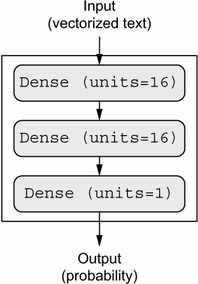



In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

The first argument passed to each Dense layer is the number of units in the layer: the dimensionality of the layer's representation space.

Let's remember the implementation of each layer:

```
output = relu(dot(input, W) + b)
```
Having 16 units means that the weight matrix `W` will have the form `(input_dimension, 16)`: the dot product with `W` will project the input data onto a 16-dimensional representation space (and then add the bias vector `b` and will apply the `relu` operation).

❓❓❓

What are the implications of increasing or decreasing the dimensionality of the layer?

❓❓❓

Function relu: 

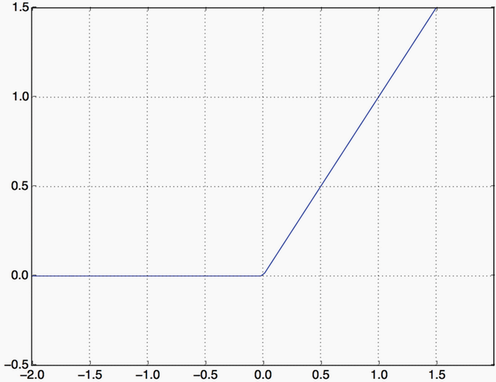

sigmoid function: 

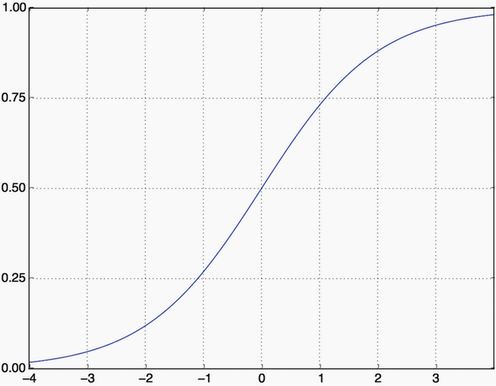

✅

Increasing or decreasing the dimensionality of a layer in a neural network has several implications:

1. Number of parameters: The number of parameters in the network is directly proportional to the dimensionality of the layer. This means that increasing the dimensionality of a layer will increase the number of parameters in the network, which may lead to overfitting if the dataset is not large enough.

1. Representation power: Increasing the dimensionality of a layer will increase the representation power of the layer, allowing the network to capture more complex and fine-grained patterns in the data. However, if the dimensionality is too high, the network may become too specialized to the training data and may not generalize well to new data.

1. Computational cost: Increasing the dimensionality of a layer will increase the computational cost of the network, as more computations are required to process the data through the layer. This may lead to longer training times and may require more powerful hardware.

1. Interpretability: Increasing the dimensionality of a layer may make it more difficult to interpret the features that the layer is detecting. This is because the features are represented in a higher-dimensional space, which may be difficult to visualize or understand.

Overall, the choice of the dimensionality of a layer is a trade-off between representation power, computational cost, and generalization ability, and should be carefully considered based on the specific task and dataset.

❓❓❓

Why are activation functions necessary?

❓❓❓

✅

Activation functions are necessary in neural networks because they introduce non-linearity into the model, allowing it to learn complex and non-linear relationships between the input and output. Without activation functions, a neural network would be a linear regression model, which can only learn linear relationships between input and output.

Activation functions are applied to the output of each neuron in a neural network, transforming the input into a new output that is passed to the next layer of the network. This allows the network to learn more complex representations of the input data.

Activation functions also help to normalize the output of each neuron, preventing it from growing too large or too small, which can cause the network to become unstable during training. Additionally, some activation functions, such as the sigmoid and tanh functions, can introduce a form of regularization that helps to prevent overfitting by constraining the values of the output.

Overall, activation functions are a fundamental component of neural networks, allowing them to learn complex and non-linear relationships between input and output, while maintaining stability and preventing overfitting.

**Model Build**

Alternatively, we could use `mean_squared_error` as loss function, although in principle cross entropy is more suitable for working with probabilistic data since it measures the distance between probability distributions (*Crossentropy*).

Summary of cross entropy:

* The root mean square error ($MSE$) is not the natural error function when we have probabilistic outputs, since it treats any difference in error equally.
* For classification problems, we should penalize more errors made for the correct class ($d_j=1$) than for the incorrect one ($d_j=0$).
* Cross entropy ($-\ln $ likelihood) is more suitable for classification problems as it compares the two probability distributions:
\begin{equation}
L = - \frac{1}{N\cdot J} \sum_{p=1}^N\left(\sum_{o=1}^J d_{po} \ln(o_{po}) \right)
\end{equation}


❓❓❓

**EXERCISE:** What would be the two probability distributions

❓❓❓

✅

In the context of cross entropy loss function for classification problems, the two probability distributions that are being compared are:

1. The predicted probability distribution: This is the probability distribution that the model outputs for each possible class. It represents the model's confidence in assigning a certain probability to each class.

1. The true probability distribution: This is the probability distribution that represents the true labels of the data. It has a value of 1 for the true class and 0 for all other classes.

The cross entropy loss function measures the difference between these two probability distributions, with the goal of minimizing this difference during training. The cross entropy loss function is a commonly used loss function for classification problems, as it penalizes more heavily for errors made on the true class and encourages the model to output higher probabilities for the true class.

In [12]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Model validation

**Reserve a validation set**

Note: in this data set it can be done because we assume them randomized. Remember concepts such as stratification when dividing the data set into training, validation and test❗❗❗.

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Train/fit the model**

Parameters:
* Training and optionally validation data
* times
* Lot size

The following code should take about 2 seconds per epoch:

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 81ms/step - loss: 0.5283 - accuracy: 0.7771 - val_loss: 0.4029 - val_accuracy: 0.8652
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3259 - accuracy: 0.8938 - val_loss: 0.3155 - val_accuracy: 0.8808
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2428 - accuracy: 0.9181 - val_loss: 0.2866 - val_accuracy: 0.8850
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1978 - accuracy: 0.9330 - val_loss: 0.2765 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1604 - accuracy: 0.9483 - val_loss: 0.3338 - val_accuracy: 0.8667
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1386 - accuracy: 0.9572 - val_loss: 0.2909 - val_accuracy: 0.8819
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1162 - accuracy: 0.9639 - val_loss: 0.3394 - val_accuracy: 0.8689
Epoch 8/20
30

Model visualization:

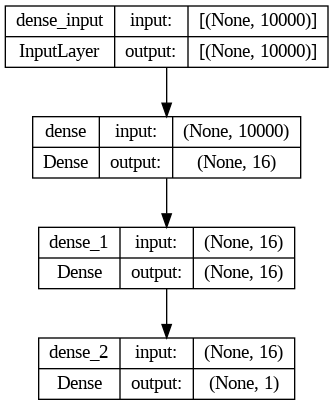

In [15]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

❓❓❓

**EXERCISE:** Why haven't we been able to visualize the model until now?

❓❓❓

✅

However, just calling `plot_model` does not create the model architecture or compile the model for training. The `model.compile` function is used to set the optimizer, loss function, and evaluation metrics for the model, and the model.fit function is used to train the model on the training data. Only after these steps have been completed can we use `plot_model` to visualize the architecture of the model.

In summary, `plot_model` is a visualization tool that can be used to visualize the architecture of a Keras model, but it does not actually create or train the model.

Adjustment history dictionary. In our case it has 4 entries, one for each metric that has been monitored during training and validation.

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plot the **loss function** in training and validation:



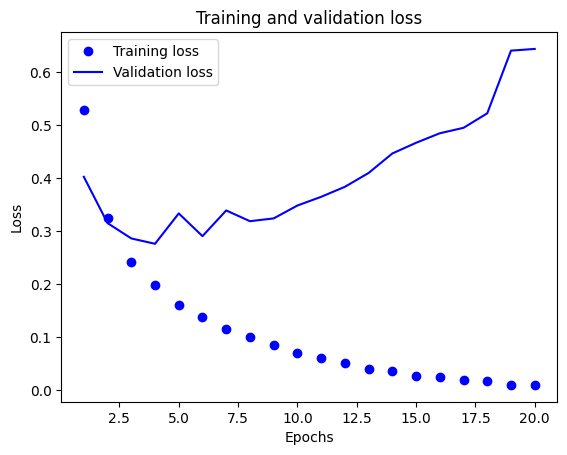

In [17]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Draw training and validation accuracy:

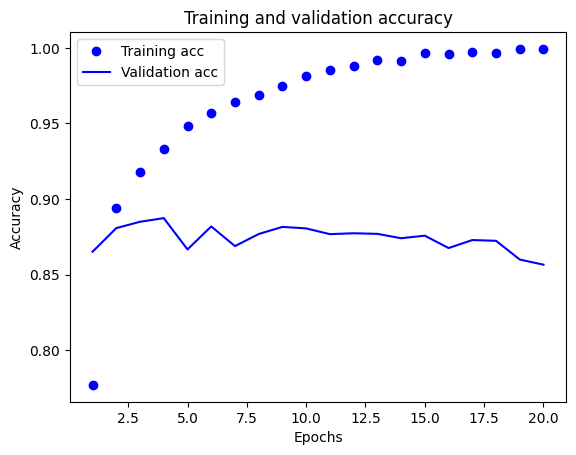

In [18]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

❓❓❓

**EXERCISE**: What do you notice in the graphs above?
How could we try to fix the problem you see? (includes code and graphics to solve and visualize it)

❓❓❓

✅

Looking at the training and validation loss plot, we can see that the training loss is decreasing with each epoch, which is a good sign. However, the validation loss seems to increase after around 4-5 epochs, which suggests that the model may be overfitting to the training data and not generalizing well to new data.

To address this overfitting issue, we can try using some form of regularization, such as dropout or weight regularization. We can also try reducing the size of the model or increasing the amount of training data, if possible.

We have to add some new libraries

In [22]:
from keras import regularizers
from keras.callbacks import EarlyStopping

In [23]:
model = keras.Sequential()
model.add(layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001), input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# add early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=3)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stop])

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.6896 - accuracy: 0.6167 - val_loss: 0.5942 - val_accuracy: 0.8337
Epoch 2/20
30/30 [==============================] - 2s 56ms/step - loss: 0.5832 - accuracy: 0.7395 - val_loss: 0.4950 - val_accuracy: 0.8590
Epoch 3/20
30/30 [==============================] - 2s 55ms/step - loss: 0.5086 - accuracy: 0.7965 - val_loss: 0.4149 - val_accuracy: 0.8764
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4509 - accuracy: 0.8364 - val_loss: 0.3683 - val_accuracy: 0.8831
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4047 - accuracy: 0.8602 - val_loss: 0.3445 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3646 - accuracy: 0.8827 - val_loss: 0.3334 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3398 - accuracy: 0.8952 - val_loss: 0.3279 - val_accuracy: 0.8868
Epoch 8/20
30

In [24]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

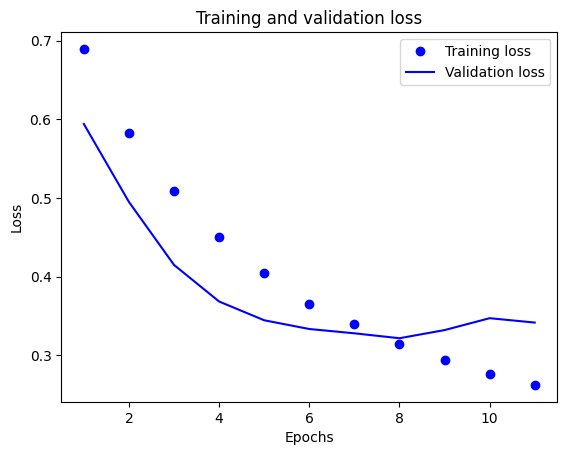

In [25]:
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Make predictions on new data

In [26]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.10424267],
       [0.9989133 ],
       [0.98674864],
       ...,
       [0.04601366],
       [0.05901265],
       [0.6176091 ]], dtype=float32)

❓❓❓

**EXERCISE**: Calculate the global precision and the confusion matrix in the test data (you have examples in previous notebooks).

❓❓❓

✅

In [28]:
# predict labels for test data
y_pred = model.predict(x_test)

# convert predicted probabilities to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

782/782 [==============================] - 2s 3ms/step


In [29]:
# calculate confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred_binary)

# print confusion matrix
print("Confusion matrix:")
print(confusion_mat)

Confusion matrix:
[[10929  1571]
 [ 1385 11115]]


In [30]:
# calculate global precision
global_precision = (confusion_mat[0,0] + confusion_mat[1,1]) / np.sum(confusion_mat)
print("Global precision: {:.2f}".format(global_precision))

Global precision: 0.88


### Expand experiments:

The following experiments will help convince you that the architecture choices you've made are quite reasonable, although there is still room for improvement:

* We have used two rendering layers before the final classification layer. Try using one or three hidden layers and see how this affects the validation and resolvability of the test.
* Try using layers with more or less units: 32 units, 64 units, etc.
* Try using the `mse` loss function instead of `binary_crossentropy`.
* Try using the `tanh` activation function instead of `relu`.

❓❓❓

**EXERCISE**: As we did before, try to collect all the notebook code in a single cell that allows you to easily experiment with different architectures and parameters. You can assume that the data is already loaded and processed and focus on the experiments. You will need to:
1. Define the model
1. Compile the model
1. Fit the model
1. Draw convergence graph
1. Calculate the precision in test

❓❓❓

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.6691 - accuracy: 0.6475 - val_loss: 0.5464 - val_accuracy: 0.8426
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.5414 - accuracy: 0.7738 - val_loss: 0.4371 - val_accuracy: 0.8707
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4599 - accuracy: 0.8368 - val_loss: 0.3761 - val_accuracy: 0.8797
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.4013 - accuracy: 0.8696 - val_loss: 0.3450 - val_accuracy: 0.8854
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3629 - accuracy: 0.8891 - val_loss: 0.3415 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 2s 60ms/step - loss: 0.3284 - accuracy: 0.9036 - val_loss: 0.3252 - val_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 2s 58ms/step - loss: 0.3006 - accuracy: 0.9183 - val_loss: 0.3368 - val_accuracy: 0.8866
Epoch 8/20
30

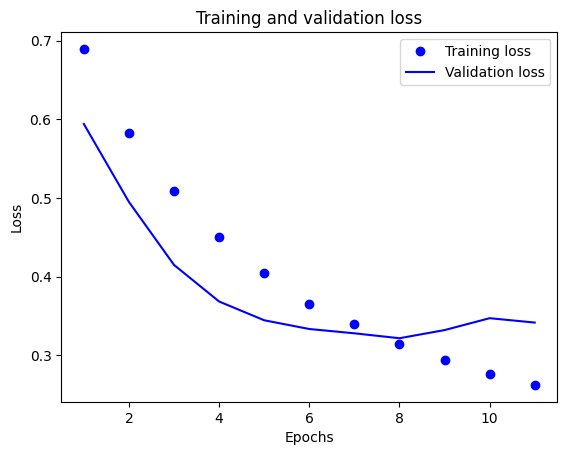

782/782 [==============================] - 2s 2ms/step
Global precision: 0.88


In [31]:
model = keras.Sequential()
model.add(layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001), input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# add early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=3)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stop])

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# predict labels for test data
y_pred = model.predict(x_test)

# convert predicted probabilities to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

confusion_mat = confusion_matrix(y_test, y_pred_binary)

# calculate global precision
global_precision = (confusion_mat[0,0] + confusion_mat[1,1]) / np.sum(confusion_mat)
print("Global precision: {:.2f}".format(global_precision))

### Summary
* Preprocessing
* `Dense` layer stacks with `relu` can solve many problems
* In binary classification we always finish the model with a `Dense` layer and `sigmoid` activation.
* So we use `binary_crossentropy.
* Importance of monitoring performance.

## Multiclass classification: news classification

* Binary classification: mutually exclusive categories
* Multiclass classification
 * Single label multiclass classification
 * Multi-label multi-class classification

### Reuterst dataset

It is a multi-tag dataset where each tag represents a *topic* associated with a news item. There are 46 different themes with different level of representation.

It can work as a simple tag considering a single main theme.

**Load Reuters dataset**

In [32]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [33]:
len(train_data)

8982

In [34]:
len(test_data)

2246

In [35]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [36]:
train_labels[10]

3

**Decode news to text**

In [37]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 1us/step


In [38]:
train_labels[3]

4

### Data preparation

**Data coding**

In [39]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [40]:
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(8982, 10000)


**Label coding**

We will use *one-hot encoding* also known as *categorical encoding*.

In [41]:
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)


In [42]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

Let's see the result:

In [43]:
print(y_train.shape)
print(y_test.shape)

(8982, 46)
(2246, 46)


As you can imagine, Keras has a function for this:

In [44]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Model construction

**Model definition**

❓❓❓ **EXERCISE:** What value would you put in HHH and in XXX?❓❓❓

```
model = keras.Sequential([
    layers.Dense(HHH, activation="relu"),
    layers.Dense(HHH, activation="relu"),
    layers.Dense(XXX, activation="softmax")
])
```

✅

Typical range for the number of hidden units is between 16 and 256

In [47]:
len(np.unique(train_labels))

46

In [48]:
model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])



**Model Build**

In [49]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Design validation

**Validation Set**

In [50]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Model Training**

In [51]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 4s 235ms/step - loss: 2.1966 - accuracy: 0.5482 - val_loss: 1.3730 - val_accuracy: 0.6760
Epoch 2/20
16/16 [==============================] - 2s 132ms/step - loss: 1.1708 - accuracy: 0.7354 - val_loss: 1.1252 - val_accuracy: 0.7550
Epoch 3/20
16/16 [==============================] - 2s 133ms/step - loss: 0.8593 - accuracy: 0.8101 - val_loss: 0.9808 - val_accuracy: 0.7870
Epoch 4/20
16/16 [==============================] - 2s 135ms/step - loss: 0.6355 - accuracy: 0.8602 - val_loss: 0.8756 - val_accuracy: 0.8200
Epoch 5/20
16/16 [==============================] - 2s 131ms/step - loss: 0.4810 - accuracy: 0.8978 - val_loss: 0.8371 - val_accuracy: 0.8230
Epoch 6/20
16/16 [==============================] - 3s 199ms/step - loss: 0.3759 - accuracy: 0.9207 - val_loss: 0.8960 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 3s 153ms/step - loss: 0.2970 - accuracy: 0.9339 - val_loss: 0.8354 - val_accuracy: 0.8160
Epoch 

**Draw training loss and validation**

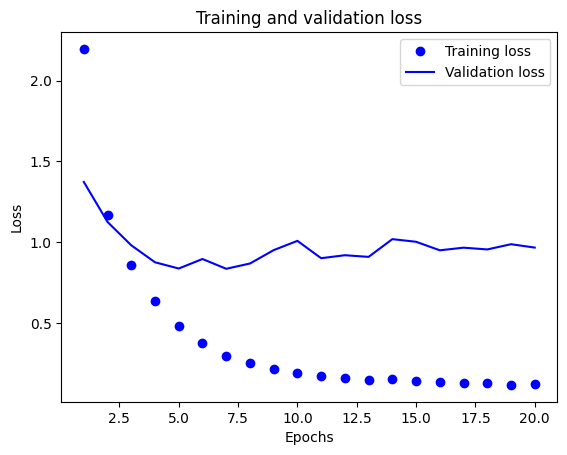

In [52]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Draw accuracy in training and validation**

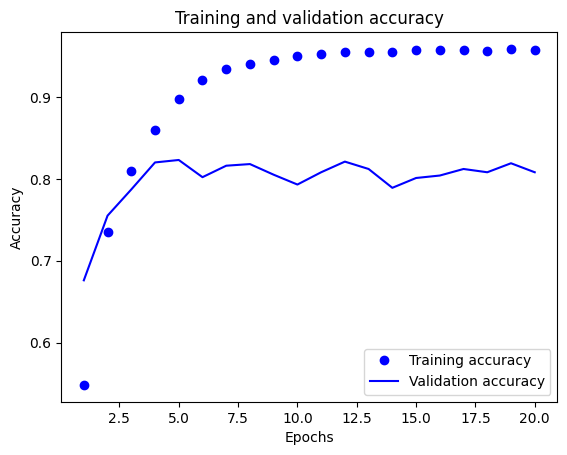

In [53]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

`# Has code format`




```
# Has code format
```
```
# Has code format
```


❓❓❓
**EXERCISE:** **Let's retrain from scratch with our conclusions**
❓❓❓

In [61]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

# load Reuters dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# vectorize sequences
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# one-hot encode labels
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# define and compile model
model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])

# add early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=3)

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# train model
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.2,
                    callbacks=[early_stop])

# evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy: {:.2f}%".format(test_acc*100))

Epoch 1/20
15/15 [==============================] - 3s 167ms/step - loss: 2.2165 - accuracy: 0.5346 - val_loss: 1.4313 - val_accuracy: 0.6912
Epoch 2/20
15/15 [==============================] - 2s 146ms/step - loss: 1.2533 - accuracy: 0.7214 - val_loss: 1.2931 - val_accuracy: 0.6978
Epoch 3/20
15/15 [==============================] - 2s 146ms/step - loss: 0.9587 - accuracy: 0.7893 - val_loss: 1.0835 - val_accuracy: 0.7524
Epoch 4/20
15/15 [==============================] - 3s 229ms/step - loss: 0.7509 - accuracy: 0.8333 - val_loss: 1.0630 - val_accuracy: 0.7730
Epoch 5/20
15/15 [==============================] - 2s 137ms/step - loss: 0.5968 - accuracy: 0.8708 - val_loss: 1.0479 - val_accuracy: 0.7518
Epoch 6/20
15/15 [==============================] - 2s 145ms/step - loss: 0.4694 - accuracy: 0.8990 - val_loss: 0.9522 - val_accuracy: 0.7896
Epoch 7/20
15/15 [==============================] - 2s 138ms/step - loss: 0.3930 - accuracy: 0.9130 - val_loss: 0.8964 - val_accuracy: 0.8002
Epoch 

❓❓❓

How do we interpret these results? Are they good or bad?

❓❓❓

✅

The training results indicate that the model is improving over the epochs, as both the training and validation accuracy are increasing, while the training and validation loss are decreasing. This suggests that the model is learning to generalize to new data, as it is performing well on both the training and validation sets.

The test accuracy of 79.70% suggests that the model is able to correctly classify 79.70% of the test set samples, which is a reasonably good performance for a multi-class classification problem with 46 classes.

Overall, the results are good, but they could potentially be improved by experimenting with different architectures, hyperparameters, or optimization techniques.

In [62]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.17275155832591274

### Generate predictions/outputs on new data

In [63]:
predictions = model.predict(x_test)

71/71 [==============================] - 1s 8ms/step


In [64]:
predictions[0].shape

(46,)

In [65]:
np.sum(predictions[0])

0.9999999

In [66]:
np.argmax(predictions[0])

3

### Another way to encode labels and loss

As an integer tensor:

In [67]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

This variant needs a different loss function:

In [68]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large interlayers

big ➡ wide

We mentioned earlier that since the output layer has 46 dimensions, intermediate layers with much less than 46 units should be avoided. Let's see what happens when we introduce an information “bottleneck” by having intermediate layers that are significantly less than 46 dimensions: for example, 4 dimensions.

**Example of model with a bottleneck**

In [69]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 2.9820 - accuracy: 0.3079 - val_loss: 2.2982 - val_accuracy: 0.3710
Epoch 2/20
63/63 [==============================] - 1s 19ms/step - loss: 1.9090 - accuracy: 0.5263 - val_loss: 1.7043 - val_accuracy: 0.5670
Epoch 3/20
63/63 [==============================] - 1s 21ms/step - loss: 1.5266 - accuracy: 0.5869 - val_loss: 1.5248 - val_accuracy: 0.5870
Epoch 4/20
63/63 [==============================] - 2s 31ms/step - loss: 1.3681 - accuracy: 0.6148 - val_loss: 1.4701 - val_accuracy: 0.6070
Epoch 5/20
63/63 [==============================] - 2s 25ms/step - loss: 1.2634 - accuracy: 0.6348 - val_loss: 1.4249 - val_accuracy: 0.6160
Epoch 6/20
63/63 [==============================] - 1s 19ms/step - loss: 1.1850 - accuracy: 0.6516 - val_loss: 1.4207 - val_accuracy: 0.6260
Epoch 7/20
63/63 [==============================] - 1s 19ms/step - loss: 1.1189 - accuracy: 0.6837 - val_loss: 1.4015 - val_accuracy: 0.6320
Epoch 8/20
63

### Additional experiments

Using what we've seen and your intuition, try the following:
* View train and validation metrics.
* Try different size hidden layers: 32, 128, etc.
* Try different number of intermediate layers.

What are the optimal parameters of your model?

### Summary

* How many output neurons do previous models have?
* When do we use the softmax function and when the sigmoid?
* What options do we have to represent the labels in a multiclass problem?
* What principles can we follow to design the network architecture?

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [70]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 2us/step


In [71]:
train_data.shape

(404, 13)

In [72]:
test_data.shape

(102, 13)

In [73]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [74]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [75]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [76]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [77]:
all_scores

[2.1227540969848633, 2.6784844398498535, 2.581630229949951, 2.5107946395874023]

In [78]:
np.mean(all_scores)

2.4734158515930176

**Saving the validation logs at each fold**

In [79]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [80]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

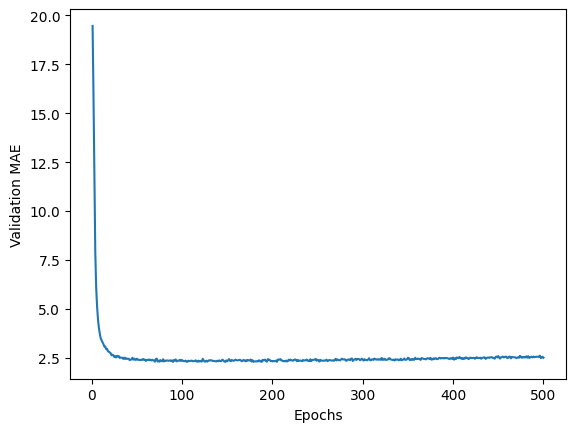

In [81]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

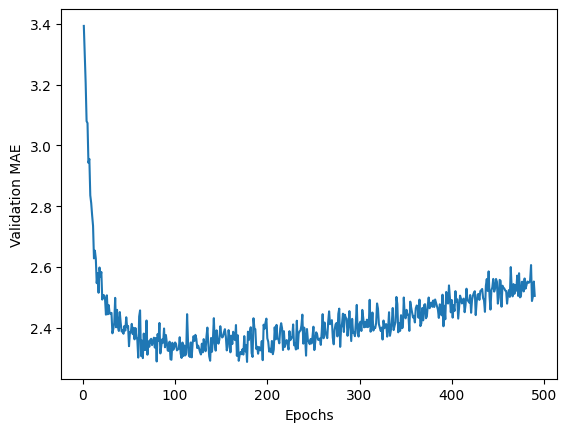

In [82]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [83]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 13.5802 - mae: 2.5435


In [84]:
test_mae_score

2.5435492992401123

### Generating predictions on new data

In [85]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([8.843143], dtype=float32)

### Wrapping up

## Summary